In [5]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

df = pd.read_csv('data_wipro.csv')
print(df.head(5))

  Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0  WIPRO     EQ  11-Jul-2022      419.10      414.75      415.00     405.55   
1  WIPRO     EQ  12-Jul-2022      411.20      409.00      414.85     408.00   
2  WIPRO     EQ  13-Jul-2022      409.15      412.00      412.00     405.35   
3  WIPRO     EQ  14-Jul-2022      406.70      410.60      410.60     400.50   
4  WIPRO     EQ  15-Jul-2022      401.45      400.95      404.10     391.00   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      411.30       411.20         409.83                8344787   
1      408.50       409.15         411.06                4888736   
2      407.10       406.70         408.54                5978390   
3      402.25       401.45         404.31                6580621   
4      393.50       393.85         394.69               11164177   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  3.419966e+09         149773          31

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  61 non-null     object 
 1   Series                  61 non-null     object 
 2   Date                    61 non-null     object 
 3   Prev Close              61 non-null     float64
 4   Open Price              61 non-null     float64
 5   High Price              61 non-null     float64
 6   Low Price               61 non-null     float64
 7   Last Price              61 non-null     float64
 8   Close Price             61 non-null     float64
 9   Average Price           61 non-null     float64
 10  Total Traded Quantity   61 non-null     int64  
 11  Turnover                61 non-null     float64
 12  No. of Trades           61 non-null     int64  
 13  Deliverable Qty         61 non-null     int64  
 14  % Dly Qt to Traded Qty  61 non-null     floa

In [11]:
X = df.drop(['Series','Symbol','Date','Average Price'],axis=1)
y=df['Average Price']
print(y.head())



0    409.83
1    411.06
2    408.54
3    404.31
4    394.69
Name: Average Price, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'predict')

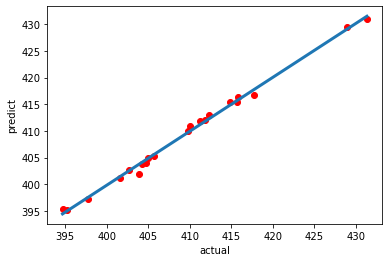

In [14]:
plt.scatter(y_test,pred_test,color='red')
plt.plot(np.unique(y_test),
        np.poly1d(np.polyfit(y_test,pred_test,1))(np.unique(y_test)),
        linewidth=3)
plt.xlabel('actual')
plt.ylabel('predict')